In [1]:
%pylab inline
import csv
import json
import numpy as np
from collections import defaultdict, OrderedDict
import matplotlib.pyplot as plt
from scipy.stats import pearsonr,spearmanr,linregress
import math
import plotly.plotly as py
import pandas as pd
import plotly.graph_objs as go

Populating the interactive namespace from numpy and matplotlib


In [3]:
users=[]
with open('user.json') as json_file:
    for line in json_file:
        users.append(json.loads(line))

In [2]:
business=[]
with open('business.json') as json_file:
    for line in json_file:
        business.append(json.loads(line))

In [5]:
tip=[]
with open('tip.json') as json_file:
    for line in json_file:
        tip.append(json.loads(line))

In [179]:
tip[0]

{u'business_id': u'tJRDll5yqpZwehenzE2cSg',
 u'date': u'2012-07-15',
 u'likes': 0,
 u'text': u'Get here early enough to have dinner.',
 u'type': u'tip',
 u'user_id': u'zcTZk7OG8ovAmh_fenH21g'}

In [7]:
users[0][u'elite']

[u'2017', u'2015', u'2016', u'2014', u'2011', u'2013', u'2012']

Break down elite users by putting together:

- yelping_since year, review_count, friends, useful/funny/cool votes, fans, compliments, avg stars (from user.json)
- review text, review stars, review date, review funny/useful/cool (from review.json)
- tips, date, likes (from tips.json)

To identify and separate the following:
1. Identify pre-elite years and reviews.
2. Identify post-elite years and reviews.

Possible combinations for elite / non-elite buckets:
- Non-elite
- Non-elite / Elite
- Non-elite / Elite / Non-elite
- Non-elite / Elite / Non-elite / Elite
- Etc.

# Questions to Answer

1. Can we assume that the requirements were the same for choosing elites over all possible years?


In [8]:
yearspossible=set()
for eachuser in range(len(users)):
    year_began = users[eachuser][u'yelping_since'][0:4]
    yearspossible.add(year_began)
yearspossible = sorted(list(yearspossible))

In [9]:
print yearspossible
year_began = '2017' #has index 13 #14-13 = 1
year_began = '2009' #has index 5 #14-5 = 9

[u'2004', u'2005', u'2006', u'2007', u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015', u'2016', u'2017']


In [10]:
percentelite = []
elitecounter=0
usercounter=0
for eachuser in range(len(users)):
    elite = users[eachuser][u'elite']
    if elite[0] != u'None':
        year_began = users[eachuser][u'yelping_since'][0:4]
        poss_yelping = (len(yearspossible)) - yearspossible.index(year_began)
        elitelen = len(users[eachuser][u'elite'])
        percentelite.append(elitelen / float(poss_yelping))
        elitecounter+=1
    usercounter+=1
    #elitearray = users[eachuser][u'elite']
    #for year in elitearray:

In [11]:
print elitecounter
print usercounter

49704
1029432


(array([ 3934.,  7741.,  7685.,  6509.,  5969.,  4699.,  4036.,  3574.,
         2785.,  2772.]),
 array([ 0.07142857,  0.16428571,  0.25714286,  0.35      ,  0.44285714,
         0.53571429,  0.62857143,  0.72142857,  0.81428571,  0.90714286,  1.        ]),
 <a list of 10 Patch objects>)

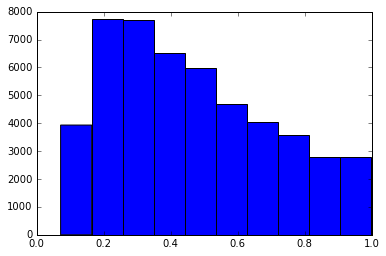

In [10]:
#What percent of the time are users "elite"?
hist(percentelite)

In [12]:
#What percent of tips are coming from elite users in years 2004-2017?

def getElites(users):
    '''Returns list of elite users for that year.'''
    elitelist = []
    selectyears = [u'2004', u'2005', u'2006', u'2007', u'2008', u'2009', u'2010', 
                   u'2011', u'2012', u'2013', u'2014', u'2015', u'2016', u'2017']
    for x in range(len(selectyears)):
        xyear=[]
        for eachuser in range(len(users)):
            elite = users[eachuser][u'elite']
            if elite[0] != u'None':
                if selectyears[x] in elite:
                    xyear.append(users[eachuser][u'user_id'])
        elitelist.append(xyear)
    return elitelist

def getNonElites(users):
    '''Returns list of elite users for that year.'''
    nonelitelist = []
    selectyears = [u'2004', u'2005', u'2006', u'2007', u'2008', u'2009', u'2010', 
                   u'2011', u'2012', u'2013', u'2014', u'2015', u'2016', u'2017']
    for x in range(len(selectyears)):
        xyear=[]
        for eachuser in range(len(users)):
            elite = users[eachuser][u'elite']
            if selectyears[x] not in elite:
                xyear.append(users[eachuser][u'user_id'])
        nonelitelist.append(xyear)
    return nonelitelist

In [15]:
elites = getElites(users)

5


In [40]:
nonelites = getNonElites(users)

In [41]:
len_elites=[]
for x in elites:
    len_elites.append(len(x))
    
len_nonelites=[]
for y in nonelites:
    len_nonelites.append(len(y))
print len_nonelites

[1029432, 1029294, 1028551, 1027080, 1025822, 1022922, 1019036, 1016360, 1011860, 1009882, 1009407, 1004423, 1000586, 1006804]


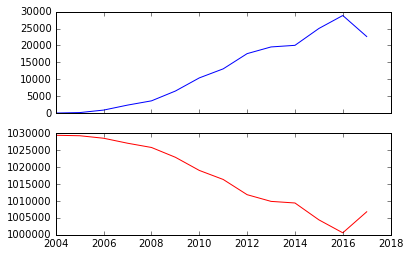

In [45]:
f, ax = plt.subplots(2, sharex=True)
ax[0].plot(yearspossible, len_elites)
ax[1].plot(yearspossible, len_nonelites, color='r')
plt.show()

In [68]:
#946600 tips, what percent of them belong to elite users?

def groupTipsbyYear(tip):
    tyears = []
    selectyears = [u'2004', u'2005', u'2006', u'2007', u'2008', u'2009', u'2010', 
                   u'2011', u'2012', u'2013', u'2014', u'2015', u'2016', u'2017']
    for x in selectyears:
        xyear=[]
        for t in range(len(tip)):
            yeargiven = tip[t][u'date'][0:4]
            if x == yeargiven:
                xyear.append(tip[t][u'user_id'])
        tyears.append(xyear)
    return tyears

def getTipElites(tipyears, elites):
    elitetipcounts=[]
    tipyears=sorted(tipyears)
    elites=sorted(elites)
    for tips in tipyears:
        if tips in elites:
            elitetipcounts.append(tips)
    return elitetipcounts

In [69]:
tipyears = groupTipsbyYear(tip)

In [117]:
tipelites5 = getTipElites(tipyears[5], elites[5]) #2009

In [54]:
tipelites6 = getTipElites(tipyears[6], elites[6]) #2010

In [55]:
tipelites7 = getTipElites(tipyears[7], elites[7]) #2011

In [57]:
tipelites8 = getTipElites(tipyears[8], elites[8]) #2012

In [60]:
tipelites9 = getTipElites(tipyears[9], elites[9]) #2013

In [61]:
tipelites10 = getTipElites(tipyears[10], elites[10]) #2014

In [62]:
tipelites11 = getTipElites(tipyears[11], elites[11]) #2015

In [63]:
tipelites12 = getTipElites(tipyears[12], elites[12]) #2016

In [64]:
tipelites13 = getTipElites(tipyears[13], elites[13]) #2017

In [23]:
len_tipyears=[]
for x in tipyears:
    len_tipyears.append(len(x))

In [95]:
print len_tipyears
print len_elites
print len_tipsfromelites
print percent_tipsfromelites

[0, 0, 0, 0, 0, 912, 40371, 141422, 179214, 161283, 158001, 125512, 133568, 6317]
[0, 138, 881, 2352, 3610, 6510, 10396, 13072, 17572, 19550, 20025, 25009, 28846, 22628]
[0, 0, 0, 0, 0, 287, 9928, 30462, 46004, 36981, 28927, 26247, 30965, 1442]
[0, 0, 0, 0, 0, 0.31469298245614036, 0.24591910034430656, 0.21539788717455557, 0.25669869541442075, 0.22929260988448877, 0.18308111973974847, 0.20911944674612787, 0.2318294801149976, 0.22827291435808136]


In [130]:
len_tipsfromelites = ([0, 0, 0, 0, 0] +
[len(tipelites5), len(tipelites6), len(tipelites7), len(tipelites8), len(tipelites9), len(tipelites10),
 len(tipelites11), len(tipelites12), len(tipelites13)])

percent_tipsfromelites = []
for x in range(14):
    if len_tipyears[x] != 0:
        percent_tipsfromelites.append(len_tipsfromelites[x]/float(len_tipyears[x]))
    else:
        percent_tipsfromelites.append(0)

NameError: name 'tipelites5' is not defined

In [131]:
plt.plot(yearspossible, len_tipyears, label='Total tips per year')
plt.plot(yearspossible, len_elites, label='Total amount of elites per year')
plt.plot(yearspossible, len_tipsfromelites, label='Number of tips from elites')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

NameError: name 'len_tipyears' is not defined

(0, 1.0)

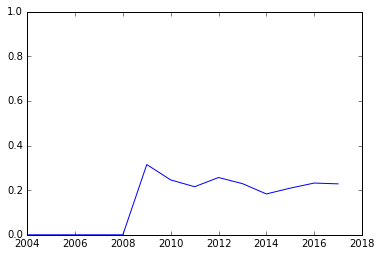

In [90]:
#How many of these tips are coming from the same individuals?
plt.plot(yearspossible, percent_tipsfromelites)
plt.ylim(0, 1.0)

In [132]:
def getEachUniqueCounts(tipelites_list):
    counts = defaultdict(int)
    for ID in tipelites_list:
        counts[ID] +=1
    return counts

In [133]:
def getAllUniqueCounts(tipelites_list):
    results = defaultdict(dict)
    selectyears = [u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015', u'2016', u'2017']
    for x in range(len(tipelites_list)):
        for ID in tipelites_list[x]:
            year = selectyears[x]
            if ID in results[year].keys():
                results[year][ID] +=1
            else:
                results[year][ID] = 1
    return results

In [109]:
alltips = [tipelites5, tipelites6, tipelites7, tipelites8, tipelites9, 
           tipelites10, tipelites11, tipelites12, tipelites13]

In [150]:
x = getAllUniqueCounts(alltips)

In [152]:
print [len(x[a].keys()) for a in yearspossible]

[0, 0, 0, 0, 0, 58, 1080, 2505, 3887, 3621, 3514, 3947, 4740, 660]


In [181]:
tipcounts=[]
for year in yearspossible:
    countvals=[]
    for k in x[year].keys():
        countvals.append(x[year][k])
    tipcounts.append(countvals)

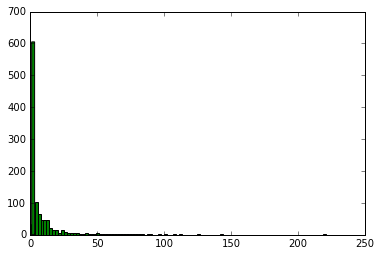

In [196]:
plt.hist(tipcounts[5], 50)
plt.hist(tipcounts[6], 100)
plt.show()

In [147]:
def getParticularCount(dictionaryx, value):
    tipcounts=[]
    selectyears = [u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015', u'2016'] #u'2017
    for a in selectyears:
        count = 0
        for k in dictionaryx[a].keys():
            if dictionaryx[a][k] == value:
                count+=1
        tipcounts.append(count)
    return tipcounts

def getParticularPercentCount(dictionaryx, value):
    percentcounts=[]
    selectyears = [u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015', u'2016'] #u'2017
    for a in selectyears:
        count = 0
        length = len(dictionaryx[a].keys())
        for k in dictionaryx[a].keys():
            if dictionaryx[a][k] == value:
                count+=1
        percentcounts.append(round(count/float(length), 4))
    return percentcounts

In [214]:
onetimers = getParticularCount(x, 1)
twotimers = getParticularCount(x, 2)
threetimers = getParticularCount(x, 3)
fourtimers = getParticularCount(x, 4)
fivetimers = getParticularCount(x, 5)

onetimersp = getParticularPercentCount(x, 1)
twotimersp = getParticularPercentCount(x, 2)
threetimersp = getParticularPercentCount(x, 3)
fourtimersp = getParticularPercentCount(x, 4)
fivetimersp = getParticularPercentCount(x, 5)

In [215]:
print onetimers
print onetimersp

[26, 324, 703, 1153, 1263, 1269, 1546, 1860, 415]
[0.4483, 0.3, 0.2806, 0.2966, 0.3488, 0.3611, 0.3917, 0.3924, 0.6288]


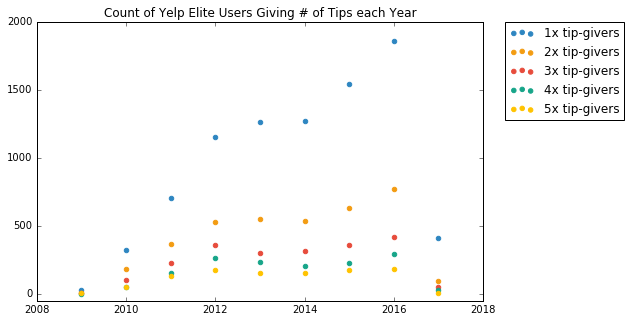

In [225]:
plt.figure(figsize=(8,5))
plt.scatter(yearspossible[5:], onetimers, color='#2E86C1', label='1x tip-givers')
plt.scatter(yearspossible[5:], twotimers, color='#F39C12', label='2x tip-givers')
plt.scatter(yearspossible[5:], threetimers, color='#E74C3C', label='3x tip-givers')
plt.scatter(yearspossible[5:], fourtimers, color='#17A589', label='4x tip-givers')
plt.scatter(yearspossible[5:], fivetimers, color='#FFC300', label='5x tip-givers')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Count of Yelp Elite Users Giving # of Tips each Year')
plt.ylim(-50, 2000)
plt.show()

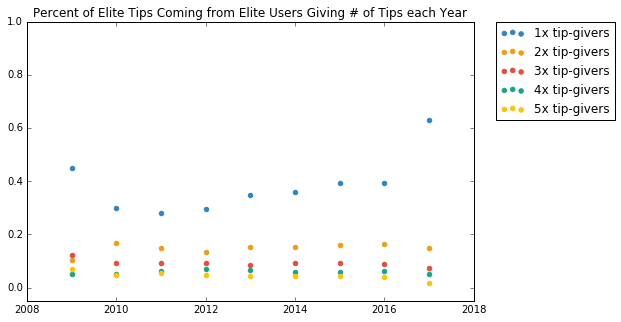

In [226]:
plt.figure(figsize=(8,5))
plt.scatter(yearspossible[5:], onetimersp, color='#2E86C1', label='1x tip-givers')
plt.scatter(yearspossible[5:], twotimersp, color='#F39C12', label='2x tip-givers')
plt.scatter(yearspossible[5:], threetimersp, color='#E74C3C', label='3x tip-givers')
plt.scatter(yearspossible[5:], fourtimersp, color='#17A589', label='4x tip-givers')
plt.scatter(yearspossible[5:], fivetimersp, color='#FFC300', label='5x tip-givers')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Percent of Elite Tips Coming from Elite Users Giving # of Tips each Year')
plt.ylim(-0.05, 1.0)
plt.show()

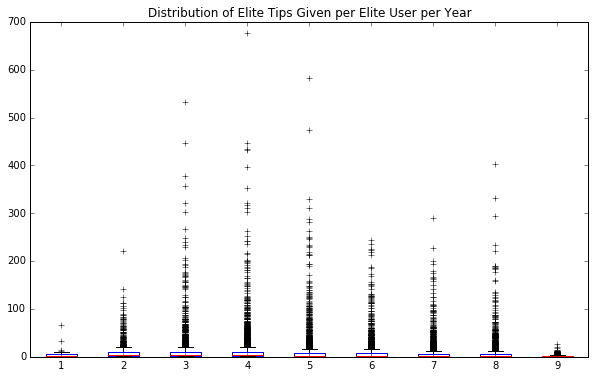

In [240]:
years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
plt.figure(figsize=(10,6))
plt.title('Distribution of Elite Tips Given per Elite User per Year')
plt.boxplot(tipcounts[5:])
#plt.xticks(years)
plt.show()

Now to do the same thing, but with non-elite users.

In [241]:
#randomly sample nonelites, because we have way too many nonelites to measure.
tipnonelites5 = getTipElites(tipyears[5], nonelites[5]) #2009

KeyboardInterrupt: 

In [244]:
print len_elites[5:]
print len_nonelites[5:]

[6510, 10396, 13072, 17572, 19550, 20025, 25009, 28846, 22628]
[1022922, 1019036, 1016360, 1011860, 1009882, 1009407, 1004423, 1000586, 1006804]


In [246]:
#Have to randomly sample the same amount per year of non-elites as elites

Tuesday April 11th:
Descriptive Statistics working with Tips and Identifying Elite Patterns

In [ ]:
def ElitePatternof4(thisyear, nextyear, users):
    '''Returns elite pattern in following list: 
    (1) elite this year | non-elite next year E.N.
    (2) elite this year | elite next year E.E.
    (3) non-elite this year | elite next year N.E.
    (4) non-elite this year | non-elite next year N.N. '''
    
    patternlist = [0, 0, 0, 0] #EN, EE, NE, NN
    for eachuser in range(len(users)):
        elite = users[eachuser][u'elite']
        if elite[0] != u'None':
            if (thisyear in elite) and (nextyear not in elite):
                patternlist[0]+=1
            elif (thisyear in elite) and (nextyear in elite):
                patternlist[1]+=1
            elif (thisyear not in elite) and (nextyear in elite):
                patternlist[2]+=1
            else:
                patternlist[3]+=1 
        elif elite[0] == u'None':
            patternlist[3]+=1 
    return patternlist

Let's look at tips from EE, NE, and EN users from 2009:

In [75]:
def UserPatternList(thisyear, nextyear, users):
    '''Returns lists of elite/non-elite users in following order: 
    (1) elite this year | non-elite next year E.N.
    (2) elite this year | elite next year E.E.
    (3) non-elite this year | elite next year N.E.'''
    
    patternlist = [[], [], []] #EN, EE, NE
    for eachuser in range(len(users)):
        elite = users[eachuser][u'elite']
        if elite[0] != u'None':
            if (thisyear in elite) and (nextyear not in elite):
                patternlist[0].append(users[eachuser][u'user_id'])
            elif (thisyear in elite) and (nextyear in elite):
                patternlist[1].append(users[eachuser][u'user_id'])
            elif (thisyear not in elite) and (nextyear in elite):
                patternlist[2].append(users[eachuser][u'user_id'])
    return patternlist

In [57]:
pattern2009 = ElitePatternof4(u'2009', u'2010', users)
pattern2010 = ElitePatternof4(u'2010', u'2011', users)
pattern2011 = ElitePatternof4(u'2011', u'2012', users)
pattern2012 = ElitePatternof4(u'2012', u'2013', users)
pattern2013 = ElitePatternof4(u'2013', u'2014', users)
pattern2014 = ElitePatternof4(u'2014', u'2015', users)
pattern2015 = ElitePatternof4(u'2015', u'2016', users)
pattern2016 = ElitePatternof4(u'2016', u'2017', users)

[0.0011, 0.0052, 0.0049, 0.9888]
[0.002, 0.0081, 0.0046, 0.9853]
[0.0025, 0.0102, 0.0069, 0.9804]
[0.0026, 0.0145, 0.0045, 0.9784]
[0.0044, 0.0146, 0.0048, 0.9762]
[0.0036, 0.0158, 0.0085, 0.9721]
[0.0041, 0.0202, 0.0078, 0.9679]
[0.0063, 0.0217, 0.0003, 0.9717]


In [ ]:
print pattern2009
print pattern2010
print pattern2011
print pattern2012
print pattern2013
print pattern2014
print pattern2015
print pattern2016

In [58]:
print [round(i/1029432.,4) for i in pattern2009]
print [round(i/1029432.,4) for i in pattern2010]
print [round(i/1029432.,4) for i in pattern2011]
print [round(i/1029432.,4) for i in pattern2012]
print [round(i/1029432.,4) for i in pattern2013]
print [round(i/1029432.,4) for i in pattern2014]
print [round(i/1029432.,4) for i in pattern2015]
print [round(i/1029432.,4) for i in pattern2016]

[0.0011, 0.0052, 0.0049, 0.9888]
[0.002, 0.0081, 0.0046, 0.9853]
[0.0025, 0.0102, 0.0069, 0.9804]
[0.0026, 0.0145, 0.0045, 0.9784]
[0.0044, 0.0146, 0.0048, 0.9762]
[0.0036, 0.0158, 0.0085, 0.9721]
[0.0041, 0.0202, 0.0078, 0.9679]
[0.0063, 0.0217, 0.0003, 0.9717]


In [65]:
userpattern09 = UserPatternList(u'2009', u'2010', users)
userpattern10 = UserPatternList(u'2010', u'2011', users)
userpattern11 = UserPatternList(u'2011', u'2012', users)
userpattern12 = UserPatternList(u'2012', u'2013', users)
userpattern13 = UserPatternList(u'2013', u'2014', users)
userpattern14 = UserPatternList(u'2014', u'2015', users)
userpattern15 = UserPatternList(u'2015', u'2016', users)
userpattern16 = UserPatternList(u'2016', u'2017', users)

In [66]:
print len(userpattern09[0]),len(userpattern09[1]),len(userpattern09[2])

1118 5392 5004


In [72]:
tipsEN09 = getTipElites(tipyears[5], userpattern09[0]) #2009
tipsEE09 = getTipElites(tipyears[5], userpattern09[1]) #2009
tipsNE09 = getTipElites(tipyears[5], userpattern09[2]) #2009

In [76]:
tipsEN10 = getTipElites(tipyears[6], userpattern10[0]) #2010
tipsEE10 = getTipElites(tipyears[6], userpattern10[1]) #2010
tipsNE10 = getTipElites(tipyears[6], userpattern10[2]) #2010

In [78]:
tipsEN11 = getTipElites(tipyears[7], userpattern11[0]) #2011
tipsEE11 = getTipElites(tipyears[7], userpattern11[1]) #2011
tipsNE11 = getTipElites(tipyears[7], userpattern11[2]) #2011

In [80]:
tipsEN12 = getTipElites(tipyears[8], userpattern12[0]) #2012
tipsEE12 = getTipElites(tipyears[8], userpattern12[1]) #2012
tipsNE12 = getTipElites(tipyears[8], userpattern12[2]) #2012

In [82]:
tipsEN13 = getTipElites(tipyears[9], userpattern13[0]) #2013
tipsEE13 = getTipElites(tipyears[9], userpattern13[1]) #2013
tipsNE13 = getTipElites(tipyears[9], userpattern13[2]) #2013

In [84]:
tipsEN14 = getTipElites(tipyears[10], userpattern14[0]) #2014
tipsEE14 = getTipElites(tipyears[10], userpattern14[1]) #2014
tipsNE14 = getTipElites(tipyears[10], userpattern14[2]) #2014

In [87]:
tipsEN15 = getTipElites(tipyears[11], userpattern15[0]) #2015
tipsEE15 = getTipElites(tipyears[11], userpattern15[1]) #2015
tipsNE15 = getTipElites(tipyears[11], userpattern15[2]) #2015

In [89]:
tipsEN16 = getTipElites(tipyears[12], userpattern16[0]) #2016
tipsEE16 = getTipElites(tipyears[12], userpattern16[1]) #2016
tipsNE16 = getTipElites(tipyears[12], userpattern16[2]) #2016

In [90]:
print len(tipsEN09),len(tipsEE09),len(tipsNE09)
print len(tipsEN10),len(tipsEE10),len(tipsNE10)
print len(tipsEN11),len(tipsEE11),len(tipsNE11)
print len(tipsEN12),len(tipsEE12),len(tipsNE12)
print len(tipsEN13),len(tipsEE13),len(tipsNE13)
print len(tipsEN14),len(tipsEE14),len(tipsNE14)
print len(tipsEN15),len(tipsEE15),len(tipsNE15)
print len(tipsEN16),len(tipsEE16),len(tipsNE16)

5 282 29
920 9008 1942
4659 25803 6375
4336 41668 4938
4496 32485 4053
2729 26198 5695
2229 24018 3804
2879 28086 358


In [ ]:
#lentips = [912, 40371, 141422, 179214, 161283, 158001, 125512, 133568, 6317]

In [108]:
tipsEEyears = ([0,0,0,0,0]+[len(tipsEE09), len(tipsEE10), len(tipsEE11), len(tipsEE12), len(tipsEE13), len(tipsEE14),
 len(tipsEE15), len(tipsEE16)])

tipsNEyears = ([0,0,0,0,0]+[len(tipsNE09), len(tipsNE10), len(tipsNE11), len(tipsNE12), len(tipsNE13), len(tipsNE14),
 len(tipsNE15), len(tipsNE16)])

tipsENyears = ([0,0,0,0,0]+[len(tipsEN09), len(tipsEN10), len(tipsEN11), len(tipsEN12), len(tipsEN13), len(tipsEN14),
 len(tipsEN15), len(tipsEN16)])

In [109]:
print tipsEEyears
print tipsNEyears
print tipsENyears
print yearspossible[5:13]

[0, 0, 0, 0, 0, 282, 9008, 25803, 41668, 32485, 26198, 24018, 28086]
[0, 0, 0, 0, 0, 29, 1942, 6375, 4938, 4053, 5695, 3804, 358]
[0, 0, 0, 0, 0, 5, 920, 4659, 4336, 4496, 2729, 2229, 2879]
[u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015', u'2016']


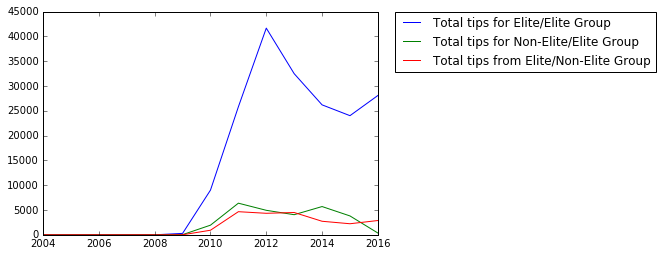

In [111]:
plt.plot(yearspossible[:13], tipsEEyears, label='Total tips for Elite/Elite Group')
plt.plot(yearspossible[:13], tipsNEyears, label='Total tips for Non-Elite/Elite Group')
plt.plot(yearspossible[:13], tipsENyears, label='Total tips from Elite/Non-Elite Group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [127]:
tipsEN_TPU=([0,0,0,0,0]+[round(len(tipsEN09)/float(len(userpattern09[0])),4),
                round(len(tipsEN10)/float(len(userpattern10[0])),4),
                round(len(tipsEN11)/float(len(userpattern11[0])),4),
                round(len(tipsEN12)/float(len(userpattern12[0])),4),
                round(len(tipsEN13)/float(len(userpattern13[0])),4),
                round(len(tipsEN14)/float(len(userpattern14[0])),4),
                round(len(tipsEN15)/float(len(userpattern15[0])),4),
                round(len(tipsEN16)/float(len(userpattern16[0])),4)])

tipsEE_TPU=([0,0,0,0,0]+[round(len(tipsEE09)/float(len(userpattern09[1])),4),
                round(len(tipsEE10)/float(len(userpattern10[1])),4),
                round(len(tipsEE11)/float(len(userpattern11[1])),4),
                round(len(tipsEE12)/float(len(userpattern12[1])),4),
                round(len(tipsEE13)/float(len(userpattern13[1])),4),
                round(len(tipsEE14)/float(len(userpattern14[1])),4),
                round(len(tipsEE15)/float(len(userpattern15[1])),4),
                round(len(tipsEE16)/float(len(userpattern16[1])),4)])

tipsNE_TPU=([0,0,0,0,0]+[round(len(tipsNE09)/float(len(userpattern09[2])),4),
                round(len(tipsNE10)/float(len(userpattern10[2])),4),
                round(len(tipsNE11)/float(len(userpattern11[2])),4),
                round(len(tipsNE12)/float(len(userpattern12[2])),4),
                round(len(tipsNE13)/float(len(userpattern13[2])),4),
                round(len(tipsNE14)/float(len(userpattern14[2])),4),
                round(len(tipsNE15)/float(len(userpattern15[2])),4),
                round(len(tipsNE16)/float(len(userpattern16[2])),4)])

In [128]:
print 'Elite/Non-Elite Tips-Per-User: ', tipsEN_TPU
print 'Elite/Elite Tips-Per-User: ', tipsEE_TPU
print 'Non-Elite/Elite Tips-Per-User: ', tipsNE_TPU

Elite/Non-Elite Tips-Per-User:  [0, 0, 0, 0, 0, 0.0045, 0.4381, 1.7789, 1.6161, 0.9973, 0.7312, 0.533, 0.4421]
Elite/Elite Tips-Per-User:  [0, 0, 0, 0, 0, 0.0523, 1.0858, 2.4685, 2.7986, 2.1596, 1.6079, 1.1532, 1.2575]
Non-Elite/Elite Tips-Per-User:  [0, 0, 0, 0, 0, 0.0058, 0.4066, 0.8955, 1.0594, 0.8134, 0.6534, 0.4744, 1.2177]


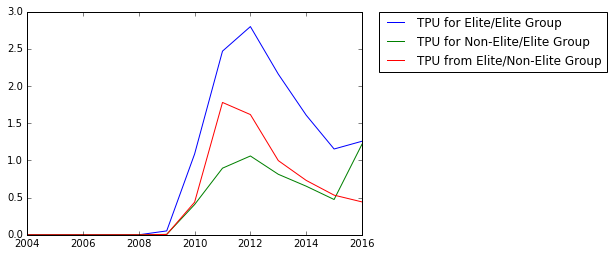

In [129]:
plt.plot(yearspossible[:13], tipsEE_TPU, label='TPU for Elite/Elite Group')
plt.plot(yearspossible[:13], tipsNE_TPU, label='TPU for Non-Elite/Elite Group')
plt.plot(yearspossible[:13], tipsEN_TPU, label='TPU from Elite/Non-Elite Group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [148]:
allEEtips = [tipsEE09, tipsEE10, tipsEE11, tipsEE12, tipsEE13, tipsEE14, tipsEE15, tipsEE16]

In [149]:
allENtips = [tipsEN09, tipsEN10, tipsEN11, tipsEN12, tipsEN13, tipsEN14, tipsEN15, tipsEN16]

In [150]:
allNEtips = [tipsNE09, tipsNE10, tipsNE11, tipsNE12, tipsNE13, tipsNE14, tipsNE15, tipsNE16]

In [151]:
EEx = getAllUniqueCounts(allEEtips)

In [152]:
ENx = getAllUniqueCounts(allENtips)

In [153]:
NEx = getAllUniqueCounts(allNEtips)

In [167]:
EEonetimers = [0,0,0,0,0]+getParticularCount(EEx, 1)
EEtwotimers = [0,0,0,0,0]+getParticularCount(EEx, 2)
EEthreetimers = [0,0,0,0,0]+getParticularCount(EEx, 3)
EEfourtimers = [0,0,0,0,0]+getParticularCount(EEx, 4)
EEfivetimers = [0,0,0,0,0]+getParticularCount(EEx, 5)

NEonetimers = [0,0,0,0,0]+getParticularCount(NEx, 1)
NEtwotimers = [0,0,0,0,0]+getParticularCount(NEx, 2)
NEthreetimers = [0,0,0,0,0]+getParticularCount(NEx, 3)
NEfourtimers = [0,0,0,0,0]+getParticularCount(NEx, 4)
NEfivetimers = [0,0,0,0,0]+getParticularCount(NEx, 5)

ENonetimers = [0,0,0,0,0]+getParticularCount(ENx, 1)
ENtwotimers = [0,0,0,0,0]+getParticularCount(ENx, 2)
ENthreetimers = [0,0,0,0,0]+getParticularCount(ENx, 3)
ENfourtimers = [0,0,0,0,0]+getParticularCount(ENx, 4)
ENfivetimers = [0,0,0,0,0]+getParticularCount(ENx, 5)

#EEonetimersp = getParticularPercentCount(EEx, 1)
#EEtwotimersp = getParticularPercentCount(EEx, 2)
#EEthreetimersp = getParticularPercentCount(EEx, 3)
#EEfourtimersp = getParticularPercentCount(EEx, 4)
#EEfivetimersp = getParticularPercentCount(EEx, 5)

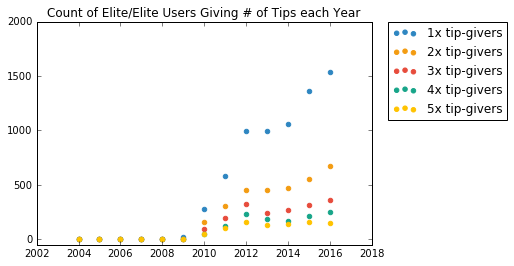

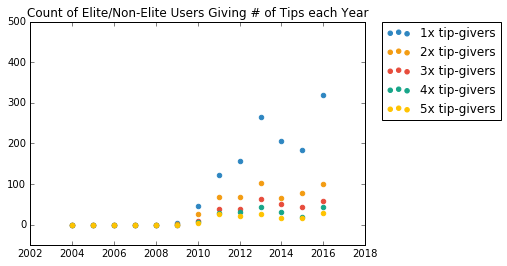

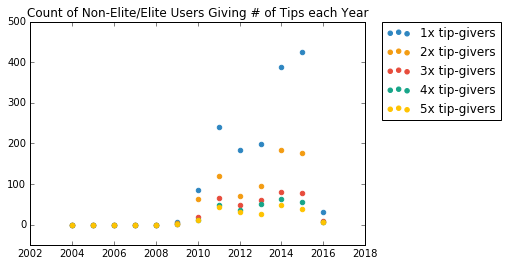

In [175]:
plt.scatter(yearspossible[:13], EEonetimers, color='#2E86C1', label='1x tip-givers')
plt.scatter(yearspossible[:13], EEtwotimers, color='#F39C12', label='2x tip-givers')
plt.scatter(yearspossible[:13], EEthreetimers, color='#E74C3C', label='3x tip-givers')
plt.scatter(yearspossible[:13], EEfourtimers, color='#17A589', label='4x tip-givers')
plt.scatter(yearspossible[:13], EEfivetimers, color='#FFC300', label='5x tip-givers')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Count of Elite/Elite Users Giving # of Tips each Year')
plt.ylim(-50, 2000)
plt.show()

plt.scatter(yearspossible[:13], ENonetimers, color='#2E86C1', label='1x tip-givers')
plt.scatter(yearspossible[:13], ENtwotimers, color='#F39C12', label='2x tip-givers')
plt.scatter(yearspossible[:13], ENthreetimers, color='#E74C3C', label='3x tip-givers')
plt.scatter(yearspossible[:13], ENfourtimers, color='#17A589', label='4x tip-givers')
plt.scatter(yearspossible[:13], ENfivetimers, color='#FFC300', label='5x tip-givers')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Count of Elite/Non-Elite Users Giving # of Tips each Year')
plt.ylim(-50, 500)
plt.show()

plt.scatter(yearspossible[:13], NEonetimers, color='#2E86C1', label='1x tip-givers')
plt.scatter(yearspossible[:13], NEtwotimers, color='#F39C12', label='2x tip-givers')
plt.scatter(yearspossible[:13], NEthreetimers, color='#E74C3C', label='3x tip-givers')
plt.scatter(yearspossible[:13], NEfourtimers, color='#17A589', label='4x tip-givers')
plt.scatter(yearspossible[:13], NEfivetimers, color='#FFC300', label='5x tip-givers')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Count of Non-Elite/Elite Users Giving # of Tips each Year')
plt.ylim(-50, 500)
plt.show()